# Chapter 4: Traning Models
This work is partialy combined text and code from the book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) is only supposed to be used as reference and is recommended to follow along with a copy of the Book puchased.

# Linear Regression

### The Normal Equation

To find the value of theta that minimizes the cost function, Normal Equation gives result directly.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

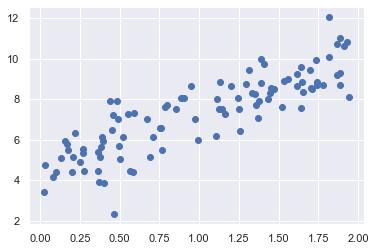

In [ ]:
plt.scatter(X, y)

In [ ]:
X_b = np.c_[np.ones((100, 1)),X] # add x0 = 1 to each instance of X
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.49312902],
       [2.78107605]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.49312902],
       [10.05528112]])

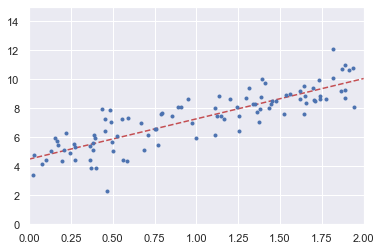

In [ ]:
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0 , 15])
plt.show()

### Singular Value Decompositon (SVD)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90002599]), array([[3.13380286]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.49312902],
       [10.05528112]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.49312902],
       [2.78107605]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.49312902],
       [2.78107605]])

### Batch Gradient Descent

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.49312902],
       [2.78107605]])

###  Stochastic Gradient Descent

In [ ]:
n_epochs =  50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi =   y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.60950716],
       [2.75449432]])

In [ ]:
# Using Scikit-learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87819068]), array([3.19868512]))

### Polynomial Regression

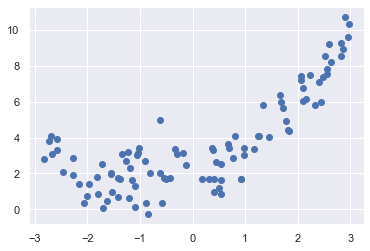

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.36156733])

In [ ]:
X_poly[0]

array([2.51239096, 6.31210834])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01046092]), array([[1.00573412, 0.52047692]]))

### Learning Curves

These are plots of the models's performance on the training set and the validation set as s function of the training set size (or the training iteration)

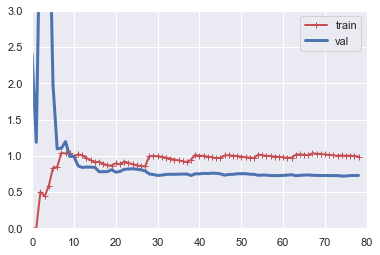

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', lw=2, label ='train')
    plt.plot(np.sqrt(val_errors), 'b-', lw=3, label='val')
    plt.axis([0.0, 80, 0.0, 3.0])
    plt.legend()
    
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

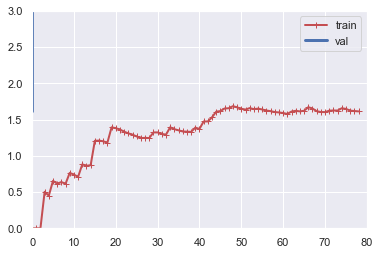

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=100, include_bias=False)),
    ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[8.55291565]])

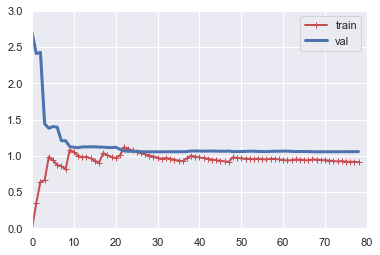

In [ ]:
plot_learning_curves(ridge_reg, X, y)

In [ ]:
# Using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.70399814])

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.44318553])

## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.3206898])

## Early Stopping

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_Reg = SGDRegressor(max_iter=1, tol=-np.infinity, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# Logistic Regression

## On Iris Dataset

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
print('DataSet Keys :',list(iris.keys()))
print('Feature Names :', iris['feature_names'])
print('Target :', iris['target'])
print('Target Names :', iris['target_names'])

DataSet Keys : ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
Feature Names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target Names : ['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris['data'][:, 3:] # 'petal width (cm)' feature only; keepdim
y = (iris['target'] == 2).astype(np.int) # 1 if Iris virginica else 0

In [ ]:
# Train logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

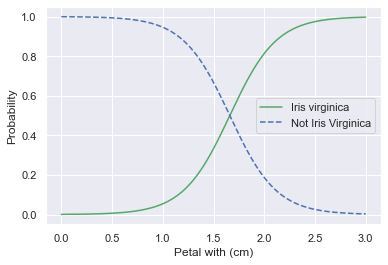

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')
plt.xlabel('Petal with (cm)')
plt.ylabel('Probability')
plt.legend()

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

# Softmax Regression

In [ ]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])